In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [6]:
# Load the training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=32
)

# Load the testing dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=32
)

# Get the class names from the training dataset
class_names = train_dataset.class_names
print("Class Names:", class_names)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [7]:
# Normalize the pixel values to the range [0, 1]
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization to training and testing datasets
train_dataset = train_dataset.map(normalize_image)
test_dataset = test_dataset.map(normalize_image)


In [14]:
# Build the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Dynamically set the number of classes
])


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model on the training dataset and validate on the testing dataset
history = model.fit(train_dataset, validation_data=test_dataset, epochs=100)


Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.7535 - loss: 0.5917 - val_accuracy: 0.5298 - val_loss: 2.0784
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7518 - loss: 0.5906 - val_accuracy: 0.5256 - val_loss: 2.1144
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.7538 - loss: 0.5929 - val_accuracy: 0.5228 - val_loss: 2.2107
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7559 - loss: 0.5912 - val_accuracy: 0.5300 - val_loss: 2.1897
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7588 - loss: 0.5755 - val_accuracy: 0.5301 - val_loss: 2.1107
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7607 - loss: 0.5711 - val_accuracy: 0.5312 - val_loss: 2.2232
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7623 - loss: 0.5702 - val_accuracy: 0.5280 - val_loss: 2.2534
Epoch 8/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.7685 - loss: 0

In [21]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5468 - loss: 3.8081
Test Accuracy: 0.5348286628723145


In [22]:
model.save('emotion_classifier.h5')


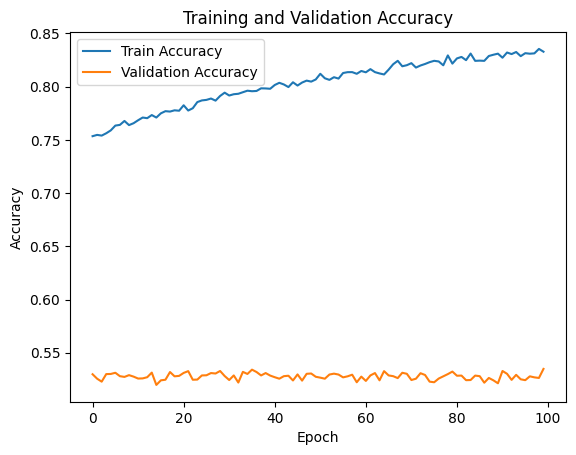

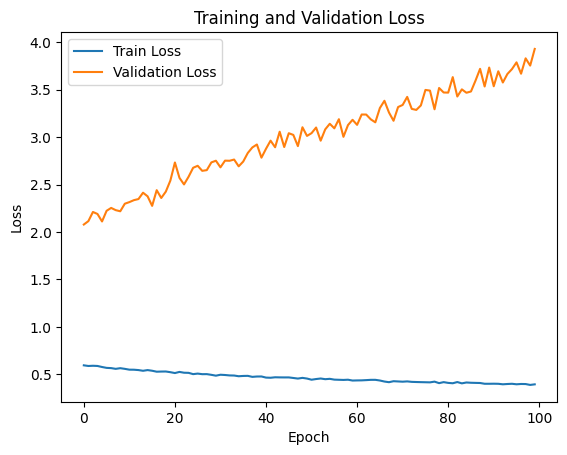

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
